##### imports

In [1]:
import ingenos
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
from matplotlib.gridspec import GridSpec
import numpy as np
import pandas as pd
import seaborn as sns

##### set the base directory

In [2]:
base = "/afs/crc.nd.edu/group/BesanskyNGS/data05/comp_karyo/data/amplicon_sequencing/"

##### read in the file of three-way comparisons between cytogenetic inversion genotype, inversion genotype determined from amplicon sequencing, and inversion genotype determined from OpenArray

In [3]:
conc = pd.read_excel(base + "results/three_way_comparisons_Formulae13Apr20.xlsx", 
                   sheet_name = "three_way_comparisons_041020")

conc.head()

,ID,village,species,a_cyto,a_amp,a_oa,concat,j_cyto,j_amp,j_oa,...,c_gam_oa,concat.4,d_cyto,d_amp,d_oa,concat.5,u_cyto,u_amp,u_oa,concat.6
0,BF0600306,Koakin,M,1.0,1,1,111,0.0,0,0,...,0,000,0.0,0,0,000,0.0,0,0,000
1,BF0600930,Kombissiri,M,2.0,1,1,211,0.0,0,0,...,0,000,0.0,0,0,000,2.0,2,2,222
2,BF0601776,Loussa,M,2.0,1,1,211,0.0,0,0,...,0,000,1.0,0,0,100,0.0,0,0,000
3,BF0605000,Namymi,M,2.0,1,1,211,0.0,0,0,...,0,000,0.0,0,0,000,1.0,1,1,111
4,BF0600708,Siguivousse,M,2.0,2,2,222,0.0,0,0,...,0,000,0.0,0,0,000,0.0,1,1,011


##### clean and trim the data

In [4]:
conc.columns

Index(['ID', 'village', 'species', 'a_cyto', 'a_amp', 'a_oa', 'concat',
       'j_cyto', 'j_amp', 'j_oa', 'concat.1', 'b_cyto', 'b_amp', 'b_oa',
       'concat.2', 'c_cyto', 'c_col_amp', 'c_col_oa', 'concat.3', 'c_cyto.1',
       'c_gam_amp', 'c_gam_oa', 'concat.4', 'd_cyto', 'd_amp', 'd_oa',
       'concat.5', 'u_cyto', 'u_amp', 'u_oa', 'concat.6'],
      dtype='object')

In [5]:
conc.rename(columns = {"concat" : "a_concat",
            "concat.1" : "j_concat",
            "concat.2" : "b_concat",
            "concat.3" : "c_col_concat",
            "concat.4" : "c_gam_concat",
            "concat.5" : "d_concat",
            "concat.6" : "u_concat"}, inplace=True)

conc.drop(columns = ["c_cyto.1"], inplace=True)

conc.columns

Index(['ID', 'village', 'species', 'a_cyto', 'a_amp', 'a_oa', 'a_concat',
       'j_cyto', 'j_amp', 'j_oa', 'j_concat', 'b_cyto', 'b_amp', 'b_oa',
       'b_concat', 'c_cyto', 'c_col_amp', 'c_col_oa', 'c_col_concat',
       'c_gam_amp', 'c_gam_oa', 'c_gam_concat', 'd_cyto', 'd_amp', 'd_oa',
       'd_concat', 'u_cyto', 'u_amp', 'u_oa', 'u_concat'],
      dtype='object')

In [6]:
conc.drop(labels=range(957,979), inplace=True)

trimmed = conc[["ID", "species", "a_concat", "j_concat", "b_concat", "c_col_concat", 
                "c_gam_concat",
                "d_concat", "u_concat"]].sort_values("species")

trimmed.head()

,ID,species,a_concat,j_concat,b_concat,c_col_concat,c_gam_concat,d_concat,u_concat
0,BF0600306,M,111,000,000,000,000,000,000
354,BF0605576,M,222,000,111,111,100,100,000
353,BF0605525,M,222,000,111,111,100,100,000
352,BF0605129,M,222,000,111,111,100,000,000
351,BF0605552,M,222,000,111,111,101,000,011


##### drop inappropriate partitions of the c data: drop the c_col values for gambiae specimens, and c_gam values for coluzzii specimens

In [7]:
trimmed.loc[trimmed["species"] == "M", "c_concat"] =\
trimmed.loc[trimmed["species"] == "M", "c_col_concat"]

trimmed.head()

,ID,species,a_concat,j_concat,b_concat,c_col_concat,c_gam_concat,d_concat,u_concat,c_concat
0,BF0600306,M,111,000,000,000,000,000,000,000
354,BF0605576,M,222,000,111,111,100,100,000,111
353,BF0605525,M,222,000,111,111,100,100,000,111
352,BF0605129,M,222,000,111,111,100,000,000,111
351,BF0605552,M,222,000,111,111,101,000,011,111


In [8]:
trimmed.tail()

,ID,species,a_concat,j_concat,b_concat,c_col_concat,c_gam_concat,d_concat,u_concat,c_concat
658,BF0604092,S,222,000,111,000,000,000,000,NaN
657,BF0604852,S,222,000,111,000,000,000,000,NaN
656,BF0604664,S,222,000,111,100,100,000,000,NaN
667,BF0604636,S,222,000,111,000,000,000,000,NaN
956,BF0602320,S,111,100,222,000,000,000,000,NaN


In [9]:
trimmed.loc[trimmed["species"] == "S", "c_concat"] =\
trimmed.loc[trimmed["species"] == "S", "c_gam_concat"]

trimmed.tail()

,ID,species,a_concat,j_concat,b_concat,c_col_concat,c_gam_concat,d_concat,u_concat,c_concat
658,BF0604092,S,222,000,111,000,000,000,000,000
657,BF0604852,S,222,000,111,000,000,000,000,000
656,BF0604664,S,222,000,111,100,100,000,000,100
667,BF0604636,S,222,000,111,000,000,000,000,000
956,BF0602320,S,111,100,222,000,000,000,000,000


In [10]:
trimmed.head()

,ID,species,a_concat,j_concat,b_concat,c_col_concat,c_gam_concat,d_concat,u_concat,c_concat
0,BF0600306,M,111,000,000,000,000,000,000,000
354,BF0605576,M,222,000,111,111,100,100,000,111
353,BF0605525,M,222,000,111,111,100,100,000,111
352,BF0605129,M,222,000,111,111,100,000,000,111
351,BF0605552,M,222,000,111,111,101,000,011,111


In [11]:
trimmed = trimmed.drop(columns = ["c_col_concat", "c_gam_concat"]).set_index(["ID", "species"])

trimmed = trimmed[["a_concat", "j_concat", "b_concat", "c_concat", "d_concat", "u_concat"]]

trimmed.head()

,,a_concat,j_concat,b_concat,c_concat,d_concat,u_concat
ID,species,,,,,,
BF0600306,M,111,000,000,000,000,000
BF0605576,M,222,000,111,111,100,000
BF0605525,M,222,000,111,111,100,000
BF0605129,M,222,000,111,111,000,000
BF0605552,M,222,000,111,111,000,011


##### color code the various combinations of agreement or disagreement between the three methods

##### all agree: green
##### missing: grey
##### all disagree: red

##### cyto and amp agree: purple
##### cyto and OA agree: black
##### OA and amp agree: orange

##### order: cyto, amp, OA

In [12]:
cmap_dict = {key : None for key in trimmed.apply(pd.Series.value_counts).index}

for key in cmap_dict.keys():
    
    if "missing" in key:
        
        cmap_dict[key] = "grey"
        
    elif key == "000" or key == "111" or key == "222":
        
        cmap_dict[key] = "green"
        
    elif key == "102" or key == "201" or key == "201" or key == "210":
        
        cmap_dict[key] = "red"
        
    elif key == "011" or key == "022" or key == "100" or key == "200" or key == "122" \
    or key == "200" or key == "211":
        
        cmap_dict[key] = "orange"
        
    elif key == "001" or key == "110" or key == "112" or key == "220" or key == "221":
        
        cmap_dict[key] = "purple"
        
    elif key == "010" or key == "101" or key == "121" or key == "202":
        
        cmap_dict[key] = "black"
        
    else:
        
        print(key)

##### simplify so that all values in one category of agreement/disagreement get the same numeric value

In [13]:
translate = {value : i for i, 
             value in enumerate(pd.unique(trimmed.replace(cmap_dict).values.ravel()))}

translate

{'green': 0, 'orange': 1, 'purple': 2, 'grey': 3, 'black': 4, 'red': 5}

In [14]:
adjusted =\
trimmed.replace(cmap_dict).replace(translate).reset_index().drop(
    columns="ID").set_index("species")

adjusted.head()

,a_concat,j_concat,b_concat,c_concat,d_concat,u_concat
species,,,,,,
M,0,0,0,0,0,0
M,0,0,0,0,1,0
M,0,0,0,0,1,0
M,0,0,0,0,0,0
M,0,0,0,0,0,1


##### create the color mappings

In [15]:
my_colors = [colors.to_rgba(key) for key in translate.keys()]

cmap = ListedColormap(my_colors)

my_colors

[(0.0, 0.5019607843137255, 0.0, 1.0),
 (1.0, 0.6470588235294118, 0.0, 1.0),
 (0.5019607843137255, 0.0, 0.5019607843137255, 1.0),
 (0.5019607843137255, 0.5019607843137255, 0.5019607843137255, 1.0),
 (0.0, 0.0, 0.0, 1.0),
 (1.0, 0.0, 0.0, 1.0)]

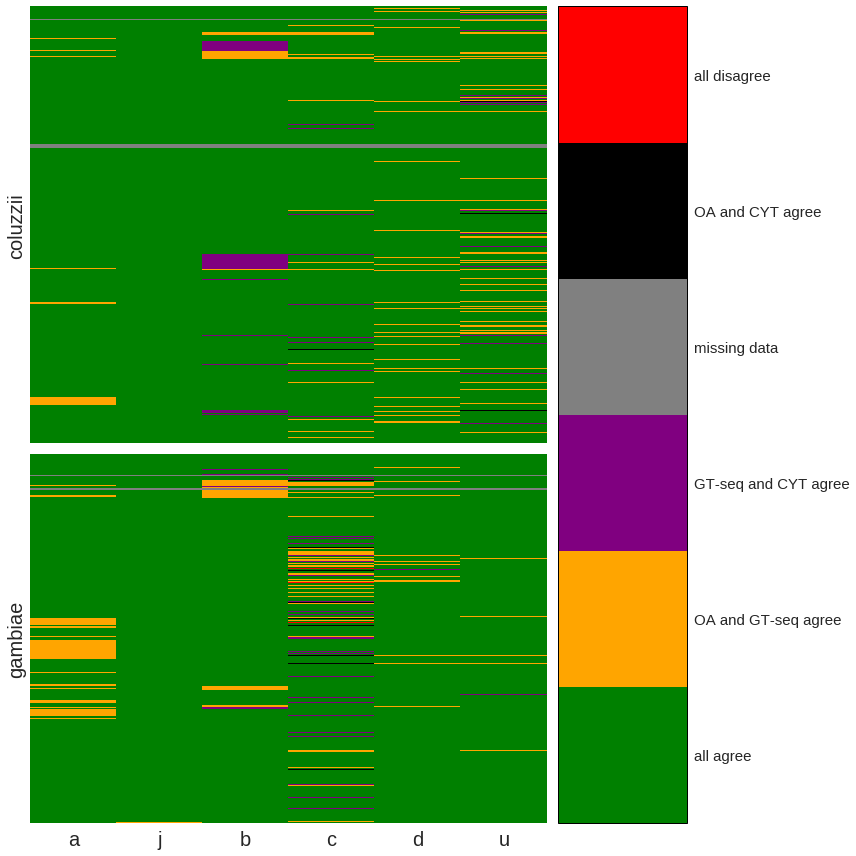

In [16]:
outString = ingenos.make_date_stamp(base + "results/heatmap")

fig = plt.figure(figsize=(12, 12))
gs1 = GridSpec(2, 2, width_ratios = [4,1], height_ratios = [519, 438], hspace=0.05)
ax1 = fig.add_subplot(gs1[0, :1])
ax2 = fig.add_subplot(gs1[1, :1])
axcb = fig.add_subplot(gs1[:, 1])

ax1 = sns.heatmap(data=adjusted.loc["M", :], cmap=cmap, cbar=False, ax=ax1, vmax=5)
ax1.set_yticks([])
ax1.set_ylabel("coluzzii", size=20)
ax1.set_xticks([])

ax2 = sns.heatmap(data=adjusted.loc["S", :], cmap=cmap, cbar_ax=axcb, ax=ax2, vmax=5)
ax2.set_yticks([])
ax2.set_ylabel("gambiae", size=20)
ax2.set_xticklabels(["a", "j", "b", "c", "d", "u"], rotation = 0, size = 20)

colorbar = ax2.collections[0].colorbar
colorbar.set_ticks(np.array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]) * (5/6))
colorbar.set_ticklabels(["all agree", "OA and GT-seq agree", "GT-seq and CYT agree",
                        "missing data", "OA and CYT agree", "all disagree"])
colorbar.ax.tick_params(labelsize=15)
colorbar.outline.set_edgecolor("black")
colorbar.outline.set_linewidth(1)

gs1.tight_layout(fig)

#plt.savefig(outString);